# **Data Visualization**

## Objectives

* Response to Business Requirement 1:
**The client aims to visually distinguish between healthy cherry leaves and those afflicted with powdery mildew.**

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train
* inputs/cherry_leaves_dataset/cherry-leaves/validation
* inputs/cherry_leaves_dataset/cherry-leaves/test

## Outputs

* Pickle file containing image shape embeddings.
* Analysis of the mean and variability for leaf images.
* Graph showcasing the contrast between healthy leaves and those infected with powdery mildew.
* Develop code addressing **Business Requirement 1**, suitable for creating an image montage on the Streamlit dashboard.


---

# Set Data Directory

---

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("darkgrid")
from matplotlib.image import imread

Matplotlib is building the font cache; this may take a moment.


## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [12]:
cwd = os.getcwd()

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [13]:
os.chdir('/workspaces/Mildew-Detection-In-Cherry-Leaves-CI-PP5')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [14]:
work_dir = os.getcwd()
work_dir

'/workspaces/Mildew-Detection-In-Cherry-Leaves-CI-PP5'

## Set input directories

Set train, validation and test paths

In [15]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'
my_data_dir

'inputs/cherry_leaves_dataset/cherry-leaves'

## Set output directory

In [16]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('The previous version is already available. Please create a new version.')
  pass
else:
  os.makedirs(name=file_path)

### Set label names

In [17]:
labels = os.listdir(train_path)
print(f'Image labels are: {labels}')

Image labels are: ['healthy', 'powdery_mildew']


---

# Data visualisation of image data

---

## Image shape

* Calculate the average image size in the training set.

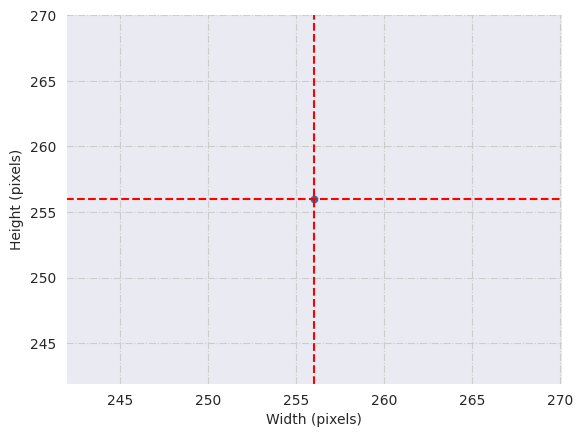

Width average: 256 
Height average: 256


In [19]:
dim1, dim2 = [], []
for label in labels:
  for image_filename in os.listdir(train_path + '/'+ label):
    img = imread(train_path + '/' + label + '/'+ image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

sns.set_style("darkgrid", {"grid.color": ".8", "grid.linestyle": "-."})
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.5)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean,color='r', linestyle='--')
axes.axhline(y=dim2_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

* The image size used for training the model is the average size of all images in the training set.

In [20]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape 

(256, 256, 3)

* Store the embeddings of the image shapes.

In [21]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
